In [1]:
import pandas as pd
import numpy as np
import matplotlib
import pandas_profiling
import missingno as msno
from IPython.display import HTML
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from matplotlib.colors import ListedColormap
import seaborn as sns
from time import time
import sklearn
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import manifold
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.cluster.hierarchy import ward, dendrogram
import scipy.cluster.hierarchy as sch

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
dma = pd.read_excel('D:/Users/Daniel Harty/Thames Water Repo/Leaky Pipes/raw_data/DMA Characterisitics 1.xlsx')

In [4]:
dma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5870 entries, 0 to 5869
Columns: 117 entries, Region to Basis_of_Estimation
dtypes: float64(90), int64(4), object(23)
memory usage: 5.2+ MB


In [5]:
dma.head()

Region        ANM      ZONE       DMA               Area  \
0  Central South  GUILDFORD   ABINGER  ZABINB01                DMA   
1  Central South  GUILDFORD   ABINGER  ZABINB01  Distribution Area   
2  Thames Valley     OXFORD  ABINGDON  ZABIND01                DMA   
3  Thames Valley     OXFORD  ABINGDON  ZABIND01  Distribution Area   
4  Thames Valley     OXFORD  ABINGDON  ZABIND02                DMA   

  Valid_From_Date  Valid_To_Date  Total_Properties  Total_Length_of_Mains_m  \
0         Initial            NaN                79                 7723.452   
1         Initial            NaN                79                 7723.452   
2         Initial            NaN              1870                24585.944   
3         Initial            NaN              1870                24585.944   
4         Initial            NaN              2701                22433.351   

   Household_Properties_no.  Non_Household_Properties_no.  \
0                        74                             5   
1                        74                             5   
2                      1615                           255   
3                      1615                           255   
4                      2602                            99   

   Continuously_Logged_Properties_no.  Length_of_Distribution_Mains_m  \
0                                   1                        7723.452   
1                                   1                        7723.452   
2                                   2                       21642.296   
3                                   2                       21642.296   
4                                   0                       22423.911   

   Length_of_Trunk_Mains_m  LAN_Entry_Date   LAN_l/s Last_PZT_Date  \
0                    0.000             NaN       NaN           NaN   
1                    0.000         38394.0  1.504722           NaN   
2                 2943.648             NaN       NaN    20/09/2017   
3                 2943.648         43252.0  5.090000    20/09/2017   
4                    9.440             NaN       NaN    20/09/2017   

  Last_PZT_Successful_Y/N DMA_Events_Affecting_Leakage_Targeting  \
0                       N                                    NaN   
1                       N                                    NaN   
2                       Y                                    NaN   
3                       Y                                    NaN   
4                       Y                                    NaN   

  DMA_Events_NOT_Affecting_Leakage_Targeting  Days_Since_Last_Available  \
0                                        R,S                        NaN   
1                                        R,S                        NaN   
2                                          S                        NaN   
3                                          S                        NaN   
4                                        R,S                        NaN   

   Nightline_w/c_27/07/2019_l/s  Nightline_w/c_20/07/2019_l/s  \
0                      1.916528                      1.900083   
1                      1.916528                      1.900083   
2                      4.542250                      4.549444   
3                      4.542250                      4.549444   
4                      5.267861                      5.335472   

   DA_Nightline_LAN_Variance_l/s  Measured_TDF_w/c_27/07/2019_l/s  \
0                            NaN                         2.718662   
1                       0.411806                         2.077449   
2                            NaN                        11.021631   
3                      -0.547750                        10.620569   
4                            NaN                        13.495625   

   Measured_TDF_w/c_20/07/2019_l/s  Leakage_w/c_27/07/2019_l/s  \
0                         3.009701                    1.764728   
1                         2.211427                    1.764728   
2                      

In [6]:
dma.columns

Index(['Region', 'ANM', 'ZONE', 'DMA', 'Area', 'Valid_From_Date',
       'Valid_To_Date', 'Total_Properties', 'Total_Length_of_Mains_m',
       'Household_Properties_no.',
       ...
       '%_Mains_material_-_Metal', '%_Mains_material_-_Plastic',
       'DMA_Operability_w/c_27/07/2019_%', 'Boundary_Link', 'Meter111',
       'Summary_Data_Missing', 'Summary_Data_Partial', 'Summary_Data_Invalid',
       'Residual_Out_Of_Range', 'Basis_of_Estimation'],
      dtype='object', length=117)

In [7]:
len(list(dma.columns))

117

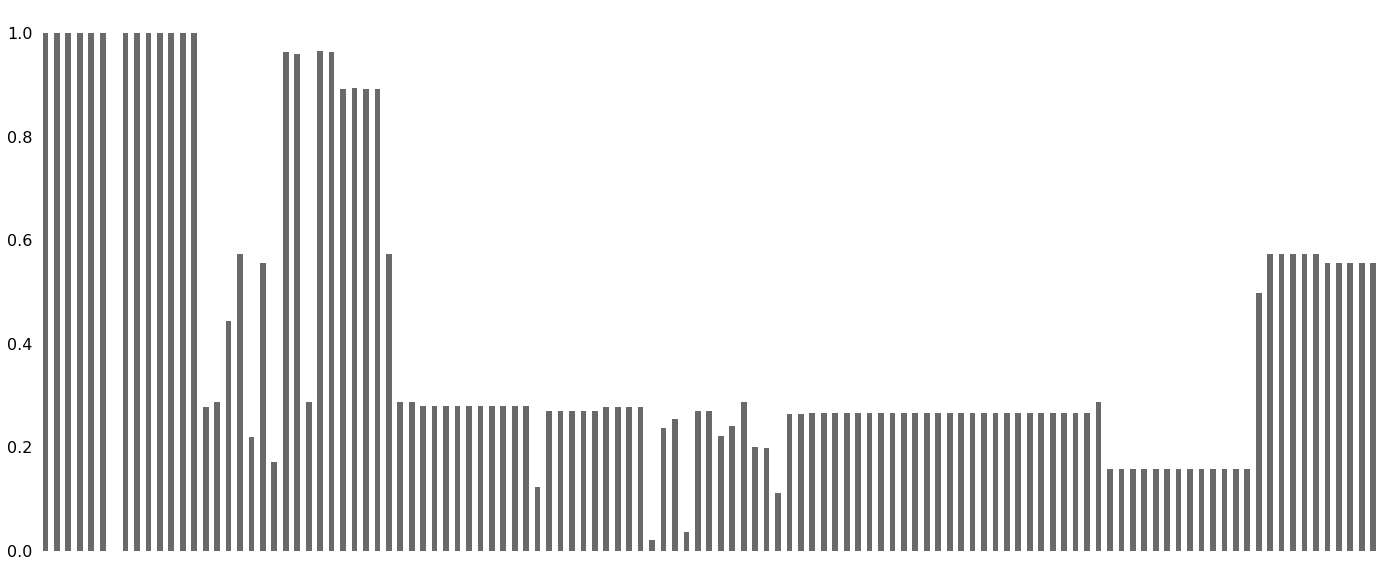

In [8]:
msno.bar(dma)

In [9]:
def drop_columns(input_df, threshold, drop_names=[]):
    df_percent_missing = round((input_df.isnull().sum()/ len(input_df)) * 100 , 2)
    for name, value in df_percent_missing.iteritems():
        if value > threshold:
            drop_names.append(name)
    return input_df.drop(drop_names, axis=1)

In [10]:
dma_copy = dma.copy()

In [11]:
dma_copy = drop_columns(dma_copy, 60.0)

In [12]:
len(list(dma_copy.columns))

36

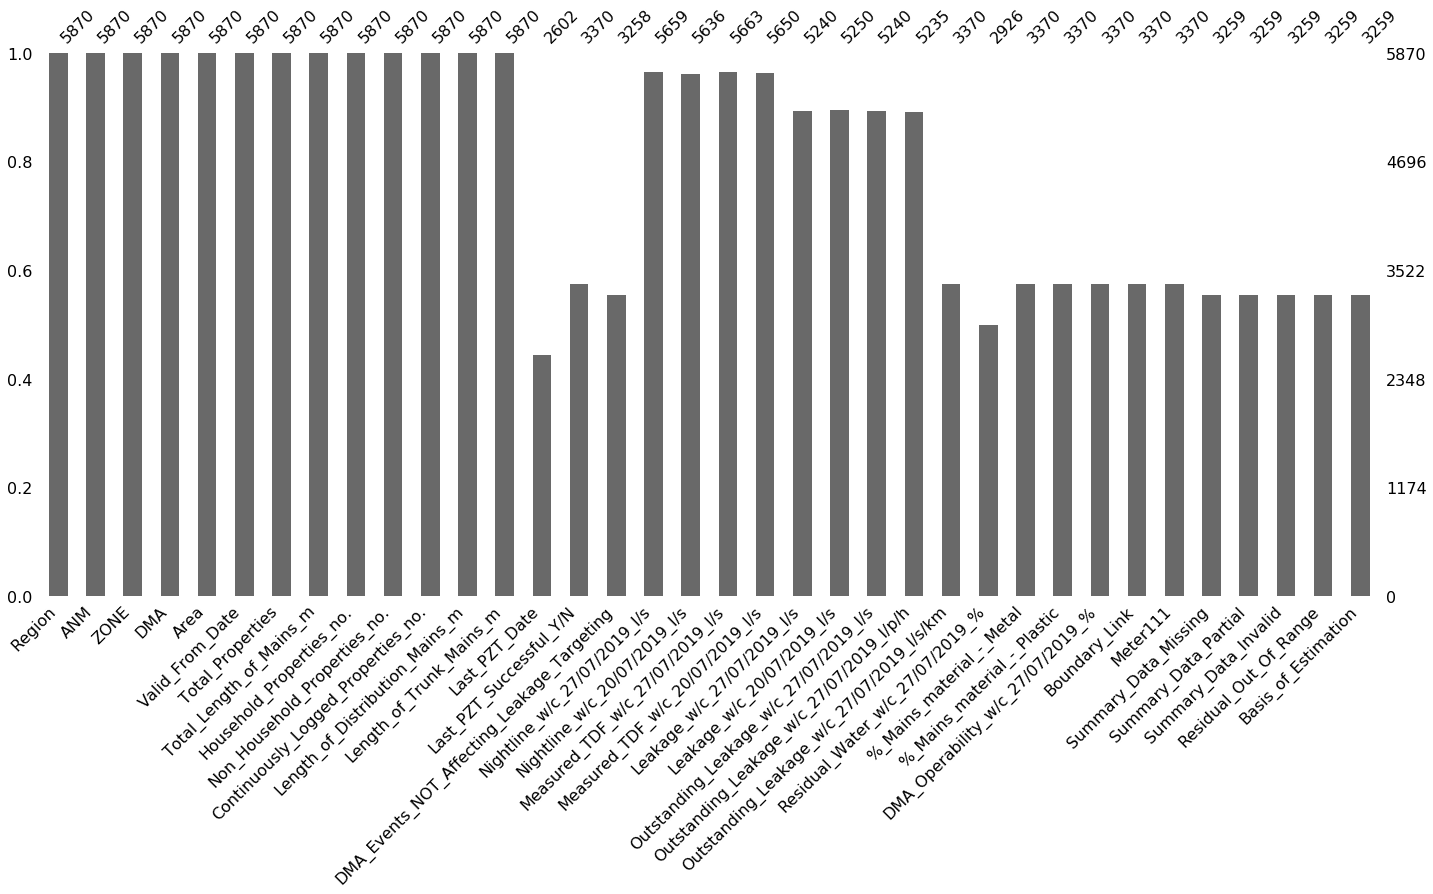

In [13]:
msno.bar(dma_copy)

In [14]:
dma_final = dma_copy.drop(labels=['Last_PZT_Date'], axis=1)

In [15]:
dma_final.head()

Region        ANM      ZONE       DMA               Area  \
0  Central South  GUILDFORD   ABINGER  ZABINB01                DMA   
1  Central South  GUILDFORD   ABINGER  ZABINB01  Distribution Area   
2  Thames Valley     OXFORD  ABINGDON  ZABIND01                DMA   
3  Thames Valley     OXFORD  ABINGDON  ZABIND01  Distribution Area   
4  Thames Valley     OXFORD  ABINGDON  ZABIND02                DMA   

  Valid_From_Date  Total_Properties  Total_Length_of_Mains_m  \
0         Initial                79                 7723.452   
1         Initial                79                 7723.452   
2         Initial              1870                24585.944   
3         Initial              1870                24585.944   
4         Initial              2701                22433.351   

   Household_Properties_no.  Non_Household_Properties_no.  \
0                        74                             5   
1                        74                             5   
2                      1615                           255   
3                      1615                           255   
4                      2602                            99   

   Continuously_Logged_Properties_no.  Length_of_Distribution_Mains_m  \
0                                   1                        7723.452   
1                                   1                        7723.452   
2                                   2                       21642.296   
3                                   2                       21642.296   
4                                   0                       22423.911   

   Length_of_Trunk_Mains_m Last_PZT_Successful_Y/N  \
0                    0.000                       N   
1                    0.000                       N   
2                 2943.648                       Y   
3                 2943.648                       Y   
4                    9.440                       Y   

  DMA_Events_NOT_Affecting_Leakage_Targeting  Nightline_w/c_27/07/2019_l/s  \
0                                        R,S                      1.916528   
1                                        R,S                      1.916528   
2                                          S                      4.542250   
3                                          S                      4.542250   
4                                        R,S                      5.267861   

   Nightline_w/c_20/07/2019_l/s  Measured_TDF_w/c_27/07/2019_l/s  \
0                      1.900083                         2.718662   
1                      1.900083                         2.077449   
2                      4.549444                        11.021631   
3                      4.549444                        10.620569   
4                      5.335472                        13.495625   

   Measured_TDF_w/c_20/07/2019_l/s  Leakage_w/c_27/07/2019_l/s  \
0                         3.009701                    1.764728   
1                         2.211427                    1.764728   
2                        12.051856                    0.321278   
3                        11.659289                    0.321278   
4                        15.008907                    2.521730   

   Leakage_w/c_20/07/2019_l/s  Outstanding_Leakage_w/c_27/07/2019_l/s  \
0                    1.748907                                1.764728   
1                    1.748907                                1.764728   
2                    0.328086                                0.321278   
3                    0.328086                                0.321278   
4                    2.377979                                2.267101   

   Outstanding_Leakage_w/c_27/07/2019_l/p/h  \
0                                 80.417985   
1                                 80.417985   
2                                  0.618503   
3                                  0.618503   
4                                  3.021682   

   Outstanding_Leakage_w/c_27/07/2019_l/s/km  Residual_Water_w/c_27/07/2019_

In [16]:
dma_final = dma_final.dropna()

In [16]:
dma_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5870 entries, 0 to 5869
Data columns (total 35 columns):
Region                                        5870 non-null object
ANM                                           5870 non-null object
ZONE                                          5870 non-null object
DMA                                           5870 non-null object
Area                                          5870 non-null object
Valid_From_Date                               5870 non-null object
Total_Properties                              5870 non-null int64
Total_Length_of_Mains_m                       5870 non-null float64
Household_Properties_no.                      5870 non-null int64
Non_Household_Properties_no.                  5870 non-null int64
Continuously_Logged_Properties_no.            5870 non-null int64
Length_of_Distribution_Mains_m                5870 non-null float64
Length_of_Trunk_Mains_m                       5870 non-null float64
Last_PZT_Successful_Y/N

In [18]:
#dma_final = dma_final.drop(labels=['Household_Properties_no.','Non_Household_Properties_no.','Length_of_Distribution_Mains_m','Length_of_Trunk_Mains_m',
                                   #'DMA_Events_NOT_Affecting_Leakage_Targeting','Nightline_w/c_20/07/2019_l/s','Measured_TDF_w/c_20/07/2019_l/s','Leakage_w/c_20/07/2019_l/s',
                                   #'Outstanding_Leakage_w/c_27/07/2019_l/p/h','Outstanding_Leakage_w/c_27/07/2019_l/s/km'], axis=1)

In [19]:
dma_report = pandas_profiling.ProfileReport(dma_final, check_correlation = False)

D:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [20]:
HTML(dma_report.to_html())

In [21]:
dma_final_cluster = dma_final.drop(labels=['Region','ANM','ZONE','DMA','Valid_From_Date','Boundary_Link','Meter111',
                                           'Summary_Data_Missing','Summary_Data_Partial','Summary_Data_Invalid'], axis=1)

In [22]:
dma_final_cluster.head()

Area  Total_Properties  Total_Length_of_Mains_m  \
0                DMA                79                 7723.452   
1  Distribution Area                79                 7723.452   
2                DMA              1863                24585.944   
3  Distribution Area              1863                24585.944   
4                DMA              2699                22433.351   

   Household_Properties_no.  Non_Household_Properties_no.  \
0                        74                             5   
1                        74                             5   
2                      1608                           255   
3                      1608                           255   
4                      2600                            99   

   Continuously_Logged_Properties_no.  Length_of_Distribution_Mains_m  \
0                                   1                        7723.452   
1                                   1                        7723.452   
2                                   2                       21642.296   
3                                   2                       21642.296   
4                                   0                       22423.911   

   Length_of_Trunk_Mains_m Last_PZT_Successful_Y/N  \
0                    0.000                       N   
1                    0.000                       N   
2                 2943.648                       Y   
3                 2943.648                       Y   
4                    9.440                       Y   

  DMA_Events_NOT_Affecting_Leakage_Targeting  Nightline_w/c_17/08/2019_l/s  \
0                                        R,S                      2.496083   
1                                        R,S                      2.496083   
2                                          S                      2.940500   
3                                          S                      2.940500   
4                                        R,S                      5.554472   

   Nightline_w/c_10/08/2019_l/s  Measured_TDF_w/c_17/08/2019_l/s  \
0                      2.244000                         2.997181   
1                      2.244000                         2.735237   
2                      4.322944                         6.644679   
3                      4.322944                         6.160839   
4                      5.435111                        13.551484   

   Measured_TDF_w/c_10/08/2019_l/s  Leakage_w/c_17/08/2019_l/s  \
0                         2.890481                    2.322309   
1                         2.423543                    2.322309   
2                        10.170679                    0.231096   
3                         9.793414                    0.231096   
4                        13.200141                    2.787653   

   Leakage_w/c_10/08/2019_l/s  Outstanding_Leakage_w/c_17/08/2019_l/s  \
0                    2.079784                                2.322309   
1                    2.079784                                2.322309   
2                    0.275799                                0.231096   
3                    0.275799                                0.231096   
4                    2.674707                                2.556171   

   Outstanding_Leakage_w/c_17/08/2019_l/p/h  \
0                                105.826740   
1                                105.826740   
2                                  0.446562   
3                                  0.446562   
4                                  3.409491   

   Outstanding_Leakage_w/c_17/08/2019_l/s/km  Residual_Water_w/c_17/08/2019_%  \
0                                   0.300683                          -3.1034   
1                                   0.300683                          -3.1034   
2                                   0.009400                         -18.4597   
3                                   0.009400                         -18.4597   
4                                   0.113945                           7.4249   

In [23]:
dma_report = pandas_profiling.ProfileReport(dma_final_cluster, check_correlation = False)

D:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [24]:
HTML(dma_report.to_html())

In [25]:
dma_final_cluster = dma_final_cluster.drop(labels=['Nightline_w/c_10/08/2019_l/s','Measured_TDF_w/c_10/08/2019_l/s','Leakage_w/c_10/08/2019_l/s','Outstanding_Leakage_w/c_17/08/2019_l/p/h',
                                           'Outstanding_Leakage_w/c_17/08/2019_l/s/km'], axis=1)

In [26]:
dma_final_cluster = pd.get_dummies(dma_final_cluster)

In [27]:
dma_final_cluster.head()

Total_Properties  Total_Length_of_Mains_m  Household_Properties_no.  \
0                79                 7723.452                        74   
1                79                 7723.452                        74   
2              1863                24585.944                      1608   
3              1863                24585.944                      1608   
4              2699                22433.351                      2600   

   Non_Household_Properties_no.  Continuously_Logged_Properties_no.  \
0                             5                                   1   
1                             5                                   1   
2                           255                                   2   
3                           255                                   2   
4                            99                                   0   

   Length_of_Distribution_Mains_m  Length_of_Trunk_Mains_m  \
0                        7723.452                    0.000   
1                        7723.452                    0.000   
2                       21642.296                 2943.648   
3                       21642.296                 2943.648   
4                       22423.911                    9.440   

   Nightline_w/c_17/08/2019_l/s  Measured_TDF_w/c_17/08/2019_l/s  \
0                      2.496083                         2.997181   
1                      2.496083                         2.735237   
2                      2.940500                         6.644679   
3                      2.940500                         6.160839   
4                      5.554472                        13.551484   

   Leakage_w/c_17/08/2019_l/s  Outstanding_Leakage_w/c_17/08/2019_l/s  \
0                    2.322309                                2.322309   
1                    2.322309                                2.322309   
2                    0.231096                                0.231096   
3                    0.231096                                0.231096   
4                    2.787653                                2.556171   

   Residual_Water_w/c_17/08/2019_%  %_Mains_material_-_Metal  \
0                          -3.1034                      6.06   
1                          -3.1034                      6.06   
2                         -18.4597                     91.62   
3                         -18.4597                     91.62   
4                           7.4249                     86.70   

   %_Mains_material_-_Plastic  DMA_Operability_w/c_17/08/2019_%  \
0                       93.77                            57.000   
1                       93.77                            57.000   
2                        8.31                            16.667   
3                        8.31                            16.667   
4                       13.19                            57.000   

   Residual_Out_Of_Range  Area_DMA  Area_Distribution Area  \
0                    2.0         1                       0   
1                    2.0         0                       1   
2                   18.0         1                       0   
3                   18.0         0                       1   
4                   10.0         1                       0   

   Last_PZT_Successful_Y/N_N  Last_PZT_Successful_Y/N_Y  \
0                          1                          0   
1                          1                          0   
2                          0                          1   
3                          0                          1   
4                          0                          1   

   DMA_Events_NOT_Affecting_Leakage_Targeting_P,R,S  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   DMA_Events_NOT_Affecting_Leakage_Targeting_P,R,S,W  \
0     

In [28]:
len(list(dma_final_cluster.columns))

38

In [29]:
# create short list of unwanted columns
labels = []

# declare the features to be all columns, less the unwanted ones from above
features = [col for col in dma_final_cluster.columns if col not in labels]

In [30]:
# create scaler object
scaler = StandardScaler()

# define scaled data frame variable
dma_final_cluster[features] = preprocessing.scale(dma_final_cluster[features])

In [31]:
## perform PCA

n = len(dma_final_cluster.columns)

pca = PCA(n_components = n)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(dma_final_cluster)
pca_2d = pca.transform(dma_final_cluster)

In [32]:
pca.explained_variance_ratio_[:2]

array([0.16216413, 0.0950128 ])

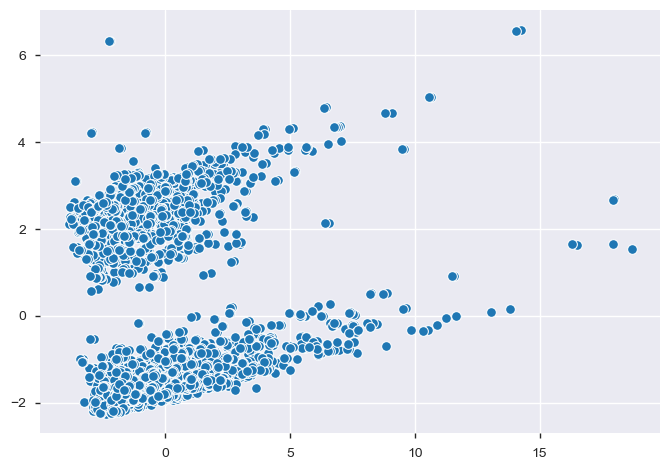

In [33]:
sns.scatterplot(pca_2d[:, 0], pca_2d[:, 1])

In [34]:
n_clusters = np.arange(1, n)

In [35]:
# store errors for each value of k
errors = []

# for i between 1 and 20
for k in n_clusters:
    # perform k-means clustering
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    km.fit(dma_final_cluster[features])
    # measure WCSS
    errors.append(km.inertia_)

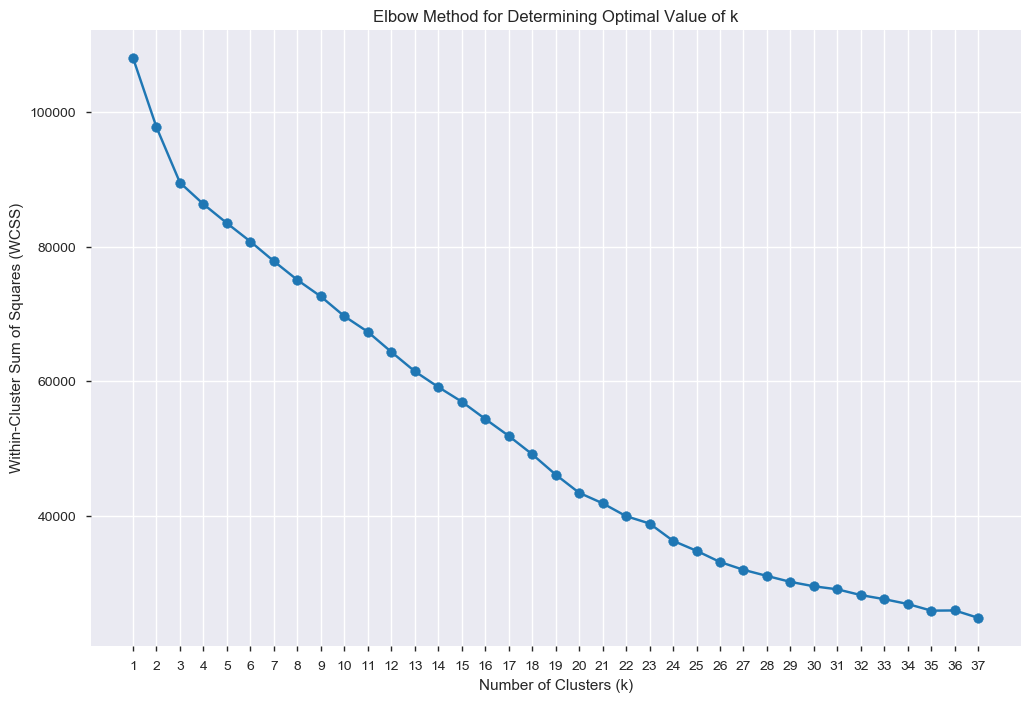

In [36]:
plt.figure(figsize=(12,8))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal Value of k')
plt.scatter(n_clusters, errors)
plt.plot(n_clusters, errors)
plt.xticks(n_clusters)
plt.show()

In [37]:
# remember to set the random state for reproducibility
km = KMeans(n_clusters=2, verbose=0, random_state=42)
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(dma_final_cluster[features])
print("done in %0.3fs" % (time() - t0))

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
done in 0.091s


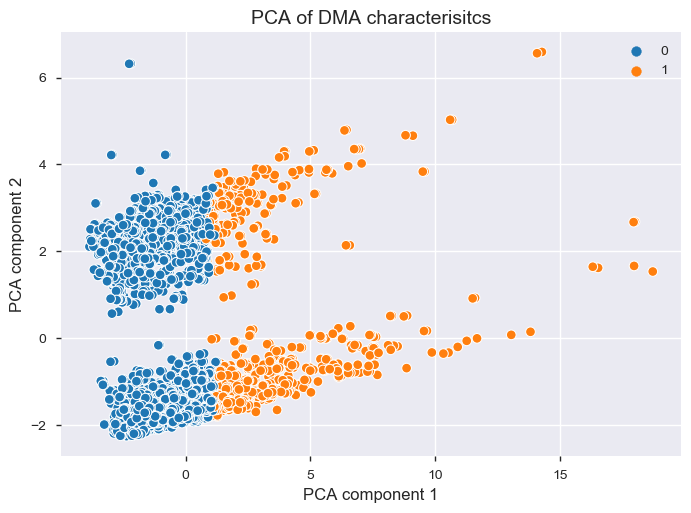

In [38]:
sns_plot = sns.scatterplot(pca_2d[:, 0], pca_2d[:, 1], hue=km.labels_)
plt.title("PCA of DMA characterisitcs", fontsize=14)
plt.ylabel('PCA component 2', fontsize=12)
plt.xlabel('PCA component 1', fontsize=12)
fig = sns_plot.get_figure()
fig.savefig("PCA_cluster.png")

In [39]:
dma_final['km_cluster'] = km.labels_

In [40]:
#dma_new = pd.read_excel('D:/Users/Daniel Harty/Thames Water Repo/Leaky Pipes/raw_data/...')

In [41]:
#pd.concat([df_a,df_b], axis=1)

In [42]:
dma_final.head()

Region        ANM      ZONE       DMA               Area  \
0  Central South  GUILDFORD   ABINGER  ZABINB01                DMA   
1  Central South  GUILDFORD   ABINGER  ZABINB01  Distribution Area   
2  Thames Valley     OXFORD  ABINGDON  ZABIND01                DMA   
3  Thames Valley     OXFORD  ABINGDON  ZABIND01  Distribution Area   
4  Thames Valley     OXFORD  ABINGDON  ZABIND02                DMA   

  Valid_From_Date  Total_Properties  Total_Length_of_Mains_m  \
0         Initial                79                 7723.452   
1         Initial                79                 7723.452   
2         Initial              1863                24585.944   
3         Initial              1863                24585.944   
4         Initial              2699                22433.351   

   Household_Properties_no.  Non_Household_Properties_no.  \
0                        74                             5   
1                        74                             5   
2                      1608                           255   
3                      1608                           255   
4                      2600                            99   

   Continuously_Logged_Properties_no.  Length_of_Distribution_Mains_m  \
0                                   1                        7723.452   
1                                   1                        7723.452   
2                                   2                       21642.296   
3                                   2                       21642.296   
4                                   0                       22423.911   

   Length_of_Trunk_Mains_m Last_PZT_Successful_Y/N  \
0                    0.000                       N   
1                    0.000                       N   
2                 2943.648                       Y   
3                 2943.648                       Y   
4                    9.440                       Y   

  DMA_Events_NOT_Affecting_Leakage_Targeting  Nightline_w/c_17/08/2019_l/s  \
0                                        R,S                      2.496083   
1                                        R,S                      2.496083   
2                                          S                      2.940500   
3                                          S                      2.940500   
4                                        R,S                      5.554472   

   Nightline_w/c_10/08/2019_l/s  Measured_TDF_w/c_17/08/2019_l/s  \
0                      2.244000                         2.997181   
1                      2.244000                         2.735237   
2                      4.322944                         6.644679   
3                      4.322944                         6.160839   
4                      5.435111                        13.551484   

   Measured_TDF_w/c_10/08/2019_l/s  Leakage_w/c_17/08/2019_l/s  \
0                         2.890481                    2.322309   
1                         2.423543                    2.322309   
2                        10.170679                    0.231096   
3                         9.793414                    0.231096   
4                        13.200141                    2.787653   

   Leakage_w/c_10/08/2019_l/s  Outstanding_Leakage_w/c_17/08/2019_l/s  \
0                    2.079784                                2.322309   
1                    2.079784                                2.322309   
2                    0.275799                                0.231096   
3                    0.275799                                0.231096   
4                    2.674707                                2.556171   

   Outstanding_Leakage_w/c_17/08/2019_l/p/h  \
0                                105.826740   
1                                105.826740   
2                                  0.446562   
3                                  0.446562   
4                                  3.409491   

   Outstanding_Leakage_w/c_17/08/2019_l/s/km  Residual_Water_w/c_17/08/2019_

In [43]:
dma_final.groupby('km_cluster').agg('mean').T

km_cluster                                            0             1
Total_Properties                            1551.206334   4111.671449
Total_Length_of_Mains_m                    11400.851734  29506.309987
Household_Properties_no.                    1440.847229   3774.827834
Non_Household_Properties_no.                 110.364229    336.850789
Continuously_Logged_Properties_no.             5.715883     20.074605
Length_of_Distribution_Mains_m             10858.147960  27073.619733
Length_of_Trunk_Mains_m                      542.703774   2432.690254
Nightline_w/c_17/08/2019_l/s                   4.299270     15.034325
Nightline_w/c_10/08/2019_l/s                   4.836229     15.971464
Measured_TDF_w/c_17/08/2019_l/s                8.303664     26.708490
Measured_TDF_w/c_10/08/2019_l/s                9.787221     29.027103
Leakage_w/c_17/08/2019_l/s                     2.453205      9.139608
Leakage_w/c_10/08/2019_l/s                     2.531951      9.269198
Outstanding_Leakage_w/c_17/08/2019_l/s         2.123729      8.095284
Outstanding_Leakage_w/c_17/08/2019_l/p/h      47.336275      8.844231
Outstanding_Leakage_w/c_17/08/2019_l/s/km      0.308160      0.397664
Residual_Water_w/c_17/08/2019_%              -10.362786     -9.181187
%_Mains_material_-_Metal                      68.394401     78.018565
%_Mains_material_-_Plastic                    28.864327     19.608479
DMA_Operability_w/c_17/08/2019_%              37.231975     44.675755
Boundary_Link                                  0.125757      0.131994
Meter111                                       0.258034      0.347202
Summary_Data_Missing                           0.665114      0.456241
Summary_Data_Partial                           0.914299      0.982783
Summary_Data_Invalid                           1.309735      1.532281
Residual_Out_Of_Range                         11.403354      8.173601

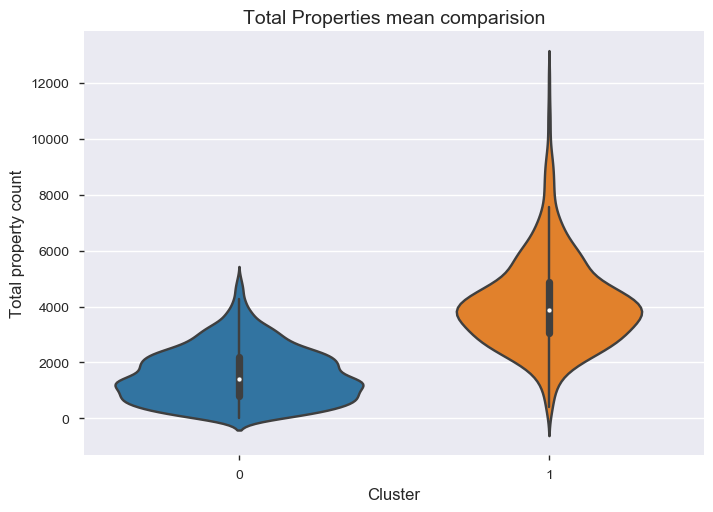

In [44]:
#plt.figure(figsize=(24, 18))
sns_plot = sns.violinplot(x='km_cluster', y='Total_Properties',data=dma_final)
plt.title("Total Properties mean comparision", fontsize=14)
plt.ylabel('Total property count', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
fig = sns_plot.get_figure()
fig.savefig("Feature_importance.png")

In [45]:
a = dma_final[(dma_final['km_cluster'] == 0)]
b = dma_final[(dma_final['km_cluster'] == 1)]
a = a['Total_Properties']
b = b['Total_Properties']

In [46]:
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)
var_a==var_b

False

In [47]:
print(var_a,var_b)

942279.1442655398 2673147.7611520668


In [48]:
stats.ttest_ind(a, b, equal_var = False)

Ttest_indResult(statistic=-39.164850784564024, pvalue=1.9418797118890378e-193)

In [17]:
dma_final.head()

Region        ANM      ZONE       DMA               Area  \
0  Central South  GUILDFORD   ABINGER  ZABINB01                DMA   
1  Central South  GUILDFORD   ABINGER  ZABINB01  Distribution Area   
2  Thames Valley     OXFORD  ABINGDON  ZABIND01                DMA   
3  Thames Valley     OXFORD  ABINGDON  ZABIND01  Distribution Area   
4  Thames Valley     OXFORD  ABINGDON  ZABIND02                DMA   

  Valid_From_Date  Total_Properties  Total_Length_of_Mains_m  \
0         Initial                79                 7723.452   
1         Initial                79                 7723.452   
2         Initial              1870                24585.944   
3         Initial              1870                24585.944   
4         Initial              2701                22433.351   

   Household_Properties_no.  Non_Household_Properties_no.  \
0                        74                             5   
1                        74                             5   
2                      1615                           255   
3                      1615                           255   
4                      2602                            99   

   Continuously_Logged_Properties_no.  Length_of_Distribution_Mains_m  \
0                                   1                        7723.452   
1                                   1                        7723.452   
2                                   2                       21642.296   
3                                   2                       21642.296   
4                                   0                       22423.911   

   Length_of_Trunk_Mains_m Last_PZT_Successful_Y/N  \
0                    0.000                       N   
1                    0.000                       N   
2                 2943.648                       Y   
3                 2943.648                       Y   
4                    9.440                       Y   

  DMA_Events_NOT_Affecting_Leakage_Targeting  Nightline_w/c_27/07/2019_l/s  \
0                                        R,S                      1.916528   
1                                        R,S                      1.916528   
2                                          S                      4.542250   
3                                          S                      4.542250   
4                                        R,S                      5.267861   

   Nightline_w/c_20/07/2019_l/s  Measured_TDF_w/c_27/07/2019_l/s  \
0                      1.900083                         2.718662   
1                      1.900083                         2.077449   
2                      4.549444                        11.021631   
3                      4.549444                        10.620569   
4                      5.335472                        13.495625   

   Measured_TDF_w/c_20/07/2019_l/s  Leakage_w/c_27/07/2019_l/s  \
0                         3.009701                    1.764728   
1                         2.211427                    1.764728   
2                        12.051856                    0.321278   
3                        11.659289                    0.321278   
4                        15.008907                    2.521730   

   Leakage_w/c_20/07/2019_l/s  Outstanding_Leakage_w/c_27/07/2019_l/s  \
0                    1.748907                                1.764728   
1                    1.748907                                1.764728   
2                    0.328086                                0.321278   
3                    0.328086                                0.321278   
4                    2.377979                                2.267101   

   Outstanding_Leakage_w/c_27/07/2019_l/p/h  \
0                                 80.417985   
1                                 80.417985   
2                                  0.618503   
3                                  0.618503   
4                                  3.021682   

   Outstanding_Leakage_w/c_27/07/2019_l/s/km  Residual_Water_w/c_27/07/2019_

In [18]:
dma_final.columns

Index(['Region', 'ANM', 'ZONE', 'DMA', 'Area', 'Valid_From_Date',
       'Total_Properties', 'Total_Length_of_Mains_m',
       'Household_Properties_no.', 'Non_Household_Properties_no.',
       'Continuously_Logged_Properties_no.', 'Length_of_Distribution_Mains_m',
       'Length_of_Trunk_Mains_m', 'Last_PZT_Successful_Y/N',
       'DMA_Events_NOT_Affecting_Leakage_Targeting',
       'Nightline_w/c_27/07/2019_l/s', 'Nightline_w/c_20/07/2019_l/s',
       'Measured_TDF_w/c_27/07/2019_l/s', 'Measured_TDF_w/c_20/07/2019_l/s',
       'Leakage_w/c_27/07/2019_l/s', 'Leakage_w/c_20/07/2019_l/s',
       'Outstanding_Leakage_w/c_27/07/2019_l/s',
       'Outstanding_Leakage_w/c_27/07/2019_l/p/h',
       'Outstanding_Leakage_w/c_27/07/2019_l/s/km',
       'Residual_Water_w/c_27/07/2019_%', '%_Mains_material_-_Metal',
       '%_Mains_material_-_Plastic', 'DMA_Operability_w/c_27/07/2019_%',
       'Boundary_Link', 'Meter111', 'Summary_Data_Missing',
       'Summary_Data_Partial', 'Summary_Data_Inval

In [21]:
dma_final = dma_final[['ZONE','DMA','Area','Total_Properties','Household_Properties_no.','Non_Household_Properties_no.','Total_Length_of_Mains_m','Length_of_Distribution_Mains_m','Length_of_Trunk_Mains_m',
                       'DMA_Events_NOT_Affecting_Leakage_Targeting','Nightline_w/c_27/07/2019_l/s','Measured_TDF_w/c_27/07/2019_l/s','Leakage_w/c_27/07/2019_l/s','%_Mains_material_-_Metal','%_Mains_material_-_Plastic',
                       'DMA_Operability_w/c_27/07/2019_%','Basis_of_Estimation']]

In [22]:
dma_final.head()

ZONE       DMA               Area  Total_Properties  \
0   ABINGER  ZABINB01                DMA                79   
1   ABINGER  ZABINB01  Distribution Area                79   
2  ABINGDON  ZABIND01                DMA              1870   
3  ABINGDON  ZABIND01  Distribution Area              1870   
4  ABINGDON  ZABIND02                DMA              2701   

   Household_Properties_no.  Non_Household_Properties_no.  \
0                        74                             5   
1                        74                             5   
2                      1615                           255   
3                      1615                           255   
4                      2602                            99   

   Total_Length_of_Mains_m  Length_of_Distribution_Mains_m  \
0                 7723.452                        7723.452   
1                 7723.452                        7723.452   
2                24585.944                       21642.296   
3                24585.944                       21642.296   
4                22433.351                       22423.911   

   Length_of_Trunk_Mains_m DMA_Events_NOT_Affecting_Leakage_Targeting  \
0                    0.000                                        R,S   
1                    0.000                                        R,S   
2                 2943.648                                          S   
3                 2943.648                                          S   
4                    9.440                                        R,S   

   Nightline_w/c_27/07/2019_l/s  Measured_TDF_w/c_27/07/2019_l/s  \
0                      1.916528                         2.718662   
1                      1.916528                         2.077449   
2                      4.542250                        11.021631   
3                      4.542250                        10.620569   
4                      5.267861                        13.495625   

   Leakage_w/c_27/07/2019_l/s  %_Mains_material_-_Metal  \
0                    1.764728                      6.06   
1                    1.764728                      6.06   
2                    0.321278                     91.62   
3                    0.321278                     91.62   
4                    2.521730                     86.70   

   %_Mains_material_-_Plastic  DMA_Operability_w/c_27/07/2019_%  \
0                       93.77                             100.0   
1                       93.77                             100.0   
2                        8.31                             100.0   
3                        8.31                             100.0   
4                       13.19                             100.0   

  Basis_of_Estimation  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN

In [53]:
dma_final.columns

Index(['ZONE', 'DMA', 'Area', 'Total_Properties', 'Household_Properties_no.',
       'Non_Household_Properties_no.', 'Total_Length_of_Mains_m',
       'Length_of_Distribution_Mains_m', 'Length_of_Trunk_Mains_m',
       'DMA_Events_NOT_Affecting_Leakage_Targeting',
       'Nightline_w/c_17/08/2019_l/s', 'Measured_TDF_w/c_17/08/2019_l/s',
       'Leakage_w/c_17/08/2019_l/s', '%_Mains_material_-_Metal',
       '%_Mains_material_-_Plastic', 'DMA_Operability_w/c_17/08/2019_%',
       'Basis_of_Estimation', 'km_cluster'],
      dtype='object')

In [54]:
dma_final_test = dma_final.drop(['ZONE','DMA'], axis=1)

In [55]:
dma_final_test = pd.get_dummies(dma_final_test)

In [56]:
dma_report = pandas_profiling.ProfileReport(dma_final_test, check_correlation = False)

D:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [57]:
HTML(dma_report.to_html())

In [58]:
dma_final_test.head()

Total_Properties  Household_Properties_no.  Non_Household_Properties_no.  \
0                79                        74                             5   
1                79                        74                             5   
2              1863                      1608                           255   
3              1863                      1608                           255   
4              2699                      2600                            99   

   Total_Length_of_Mains_m  Length_of_Distribution_Mains_m  \
0                 7723.452                        7723.452   
1                 7723.452                        7723.452   
2                24585.944                       21642.296   
3                24585.944                       21642.296   
4                22433.351                       22423.911   

   Length_of_Trunk_Mains_m  Nightline_w/c_17/08/2019_l/s  \
0                    0.000                      2.496083   
1                    0.000                      2.496083   
2                 2943.648                      2.940500   
3                 2943.648                      2.940500   
4                    9.440                      5.554472   

   Measured_TDF_w/c_17/08/2019_l/s  Leakage_w/c_17/08/2019_l/s  \
0                         2.997181                    2.322309   
1                         2.735237                    2.322309   
2                         6.644679                    0.231096   
3                         6.160839                    0.231096   
4                        13.551484                    2.787653   

   %_Mains_material_-_Metal  %_Mains_material_-_Plastic  \
0                      6.06                       93.77   
1                      6.06                       93.77   
2                     91.62                        8.31   
3                     91.62                        8.31   
4                     86.70                       13.19   

   DMA_Operability_w/c_17/08/2019_%  km_cluster  Area_DMA  \
0                            57.000           0         1   
1                            57.000           0         0   
2                            16.667           0         1   
3                            16.667           0         0   
4                            57.000           0         1   

   Area_Distribution Area  DMA_Events_NOT_Affecting_Leakage_Targeting_P,R,S  \
0                       0                                                 0   
1                       1                                                 0   
2                       0                                                 0   
3                       1                                                 0   
4                       0                                                 0   

   DMA_Events_NOT_Affecting_Leakage_Targeting_P,R,S,W  \
0                                                  0    
1                                                  0    
2                                                  0    
3                                                  0    
4                                                  0    

   DMA_Events_NOT_Affecting_Leakage_Targeting_P,S  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   DMA_Events_NOT_Affecting_Leakage_Targeting_R  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   DMA_Events_NOT_Affecting_Leakage_Targeting_R,P,S  \
0                                                 0   
1                                                 0   
2                                                 0   
3          

In [59]:
reduced_dma = dma[['ZONE', 'DMA', 'Area', 'Total_Properties', 'Household_Properties_no.','Non_Household_Properties_no.', 'Total_Length_of_Mains_m','Length_of_Distribution_Mains_m', 'Length_of_Trunk_Mains_m',
                   'DMA_Events_NOT_Affecting_Leakage_Targeting','Nightline_w/c_17/08/2019_l/s', 'Measured_TDF_w/c_17/08/2019_l/s','Leakage_w/c_17/08/2019_l/s', '%_Mains_material_-_Metal',
                   '%_Mains_material_-_Plastic','DMA_Operability_w/c_17/08/2019_%','Basis_of_Estimation']]

In [60]:
reduced_dma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5894 entries, 0 to 5893
Data columns (total 17 columns):
ZONE                                          5894 non-null object
DMA                                           5894 non-null object
Area                                          5894 non-null object
Total_Properties                              5894 non-null int64
Household_Properties_no.                      5894 non-null int64
Non_Household_Properties_no.                  5894 non-null int64
Total_Length_of_Mains_m                       5894 non-null float64
Length_of_Distribution_Mains_m                5894 non-null float64
Length_of_Trunk_Mains_m                       5894 non-null float64
DMA_Events_NOT_Affecting_Leakage_Targeting    3260 non-null object
Nightline_w/c_17/08/2019_l/s                  5664 non-null float64
Measured_TDF_w/c_17/08/2019_l/s               5664 non-null float64
Leakage_w/c_17/08/2019_l/s                    5182 non-null float64
%_Mains_material_-_

In [61]:
reduced_dma.to_csv('D:/Users/Daniel Harty/Thames Water Repo/Leaky Pipes/raw_data/Reduced DMA characterstics.csv')

In [23]:
test_1 = dma_final[dma_final['DMA'].isin(['ZWOODF08'])]

In [24]:
test_2 = dma_final[dma_final['DMA'].isin(['ZBARHT37','ZCRCHH26','ZEALBS04'])]

In [181]:
dma = reduced_dma['DMA'].unique()

In [182]:
dma[1579]

'ZWOODF08'

In [25]:
test_1.head()

ZONE       DMA               Area  Total_Properties  \
5529  WOODFORD  ZWOODF08                DMA              2275   
5530  WOODFORD  ZWOODF08  Distribution Area              2275   

      Household_Properties_no.  Non_Household_Properties_no.  \
5529                      2211                            64   
5530                      2211                            64   

      Total_Length_of_Mains_m  Length_of_Distribution_Mains_m  \
5529                 9256.809                        8466.066   
5530                 9256.809                        8466.066   

      Length_of_Trunk_Mains_m DMA_Events_NOT_Affecting_Leakage_Targeting  \
5529                  790.743                                          S   
5530                  790.743                                          S   

      Nightline_w/c_27/07/2019_l/s  Measured_TDF_w/c_27/07/2019_l/s  \
5529                     16.873222                        24.858622   
5530                     16.873222                        24.858622   

      Leakage_w/c_27/07/2019_l/s  %_Mains_material_-_Metal  \
5529                   12.892572                      98.9   
5530                   12.892572                      98.9   

      %_Mains_material_-_Plastic  DMA_Operability_w/c_27/07/2019_%  \
5529                        0.02                             100.0   
5530                        0.02                             100.0   

     Basis_of_Estimation  
5529                 NaN  
5530                 NaN

In [26]:
test_2.head(20)

ZONE       DMA               Area  Total_Properties  \
202      BARROW HILL  ZBARHT37                DMA              1283   
203      BARROW HILL  ZBARHT37  Distribution Area              1283   
1047     CROUCH HILL  ZCRCHH26                DMA              4439   
1048     CROUCH HILL  ZCRCHH26         BMA0001085               108   
1049     CROUCH HILL  ZCRCHH26         BMA0001993                44   
1050     CROUCH HILL  ZCRCHH26         BMA0001994                35   
1051     CROUCH HILL  ZCRCHH26         BMA0001998                31   
1052     CROUCH HILL  ZCRCHH26  Distribution Area              4221   
1507  EALING BOOSTER  ZEALBS04                DMA              6798   
1508  EALING BOOSTER  ZEALBS04         BMA0001870                 0   
1509  EALING BOOSTER  ZEALBS04         BMA0002163                35   
1510  EALING BOOSTER  ZEALBS04         BMA0002164                31   
1511  EALING BOOSTER  ZEALBS04         BMA0002603                29   
1512  EALING BOOSTER  ZEALBS04  Distribution Area              6703   

      Household_Properties_no.  Non_Household_Properties_no.  \
202                        954                           329   
203                        954                           329   
1047                      3893                           546   
1048                       105                             3   
1049                        44                             0   
1050                        35                             0   
1051                        31                             0   
1052                      3678                           543   
1507                      6328                           470   
1508                         0                             0   
1509                        35                             0   
1510                        31                             0   
1511                        29                             0   
1512                      6233                           470   

      Total_Length_of_Mains_m  Length_of_Distribution_Mains_m  \
202                  7042.655                        7042.655   
203                  7042.655                        7042.655   
1047                15556.883                       15556.883   
1048                    0.000                           0.000   
1049                    0.000                           0.000   
1050                    0.000                           0.000   
1051                    0.000                           0.000   
1052                15556.883                       15556.883   
1507                38206.698                       31346.658   
1508                    0.000                           0.000   
1509                    0.000                           0.000   
1510                    0.000                           0.000   
1511                    0.000                           0.000   
1512                38206.698                       31346.658   

      Length_of_Trunk_Mains_m DMA_Events_NOT_Affecting_Leakage_Targeting  \
202                      0.00                                        R,S   
203                      0.00                                        R,S   
1047                     0.00                                        R,S   
1048                     0.00                                        NaN   
1049                     0.00                                        NaN   
1050                     0.00                                        NaN   
1051                     0.00                                        NaN   
1052                     0.00                                        R,S   
1507                  6860.04                                        R,S   
1508                     0.00                                        NaN   
1509                     0.00                                        NaN   
1510                     0.00                                        NaN   
1511                     

In [27]:
useable_dma = pd.concat([test_1, test_2], axis=0, sort=False)

In [28]:
useable_dma.head(20)

ZONE       DMA               Area  Total_Properties  \
5529        WOODFORD  ZWOODF08                DMA              2275   
5530        WOODFORD  ZWOODF08  Distribution Area              2275   
202      BARROW HILL  ZBARHT37                DMA              1283   
203      BARROW HILL  ZBARHT37  Distribution Area              1283   
1047     CROUCH HILL  ZCRCHH26                DMA              4439   
1048     CROUCH HILL  ZCRCHH26         BMA0001085               108   
1049     CROUCH HILL  ZCRCHH26         BMA0001993                44   
1050     CROUCH HILL  ZCRCHH26         BMA0001994                35   
1051     CROUCH HILL  ZCRCHH26         BMA0001998                31   
1052     CROUCH HILL  ZCRCHH26  Distribution Area              4221   
1507  EALING BOOSTER  ZEALBS04                DMA              6798   
1508  EALING BOOSTER  ZEALBS04         BMA0001870                 0   
1509  EALING BOOSTER  ZEALBS04         BMA0002163                35   
1510  EALING BOOSTER  ZEALBS04         BMA0002164                31   
1511  EALING BOOSTER  ZEALBS04         BMA0002603                29   
1512  EALING BOOSTER  ZEALBS04  Distribution Area              6703   

      Household_Properties_no.  Non_Household_Properties_no.  \
5529                      2211                            64   
5530                      2211                            64   
202                        954                           329   
203                        954                           329   
1047                      3893                           546   
1048                       105                             3   
1049                        44                             0   
1050                        35                             0   
1051                        31                             0   
1052                      3678                           543   
1507                      6328                           470   
1508                         0                             0   
1509                        35                             0   
1510                        31                             0   
1511                        29                             0   
1512                      6233                           470   

      Total_Length_of_Mains_m  Length_of_Distribution_Mains_m  \
5529                 9256.809                        8466.066   
5530                 9256.809                        8466.066   
202                  7042.655                        7042.655   
203                  7042.655                        7042.655   
1047                15556.883                       15556.883   
1048                    0.000                           0.000   
1049                    0.000                           0.000   
1050                    0.000                           0.000   
1051                    0.000                           0.000   
1052                15556.883                       15556.883   
1507                38206.698                       31346.658   
1508                    0.000                           0.000   
1509                    0.000                           0.000   
1510                    0.000                           0.000   
1511                    0.000                           0.000   
1512                38206.698                       31346.658   

      Length_of_Trunk_Mains_m DMA_Events_NOT_Affecting_Leakage_Targeting  \
5529                  790.743                                          S   
5530                  790.743                                          S   
202                     0.000                                        R,S   
203                     0.000                                        R,S   
1047                    0.000                                        R,S   
1048                    0.000                                        NaN   
1049                    0.000                                        NaN   
1050 

In [29]:
mask = useable_dma['Area'] == 'DMA'

In [30]:
useable_dma = useable_dma[mask]

In [31]:
useable_dma.head()

ZONE       DMA Area  Total_Properties  \
5529        WOODFORD  ZWOODF08  DMA              2275   
202      BARROW HILL  ZBARHT37  DMA              1283   
1047     CROUCH HILL  ZCRCHH26  DMA              4439   
1507  EALING BOOSTER  ZEALBS04  DMA              6798   

      Household_Properties_no.  Non_Household_Properties_no.  \
5529                      2211                            64   
202                        954                           329   
1047                      3893                           546   
1507                      6328                           470   

      Total_Length_of_Mains_m  Length_of_Distribution_Mains_m  \
5529                 9256.809                        8466.066   
202                  7042.655                        7042.655   
1047                15556.883                       15556.883   
1507                38206.698                       31346.658   

      Length_of_Trunk_Mains_m DMA_Events_NOT_Affecting_Leakage_Targeting  \
5529                  790.743                                          S   
202                     0.000                                        R,S   
1047                    0.000                                        R,S   
1507                 6860.040                                        R,S   

      Nightline_w/c_27/07/2019_l/s  Measured_TDF_w/c_27/07/2019_l/s  \
5529                     16.873222                        24.858622   
202                       3.921306                         7.829743   
1047                      9.405651                        22.347359   
1507                     -0.039393                       -54.600542   

      Leakage_w/c_27/07/2019_l/s  %_Mains_material_-_Metal  \
5529                   12.892572                     98.90   
202                     2.315833                     97.43   
1047                    3.501389                     23.72   
1507                   11.406547                     93.07   

      %_Mains_material_-_Plastic  DMA_Operability_w/c_27/07/2019_%  \
5529                        0.02                             100.0   
202                         1.69                               0.0   
1047                       75.36                             100.0   
1507                        6.88                               0.0   

                Basis_of_Estimation  
5529                            NaN  
202   Aggregated From Operable Days  
1047   Calculated From Weekly Flows  
1507                            NaN

In [32]:
useable_dma.to_csv('D:/Users/Daniel Harty/Thames Water Repo/Leaky Pipes/raw_data/Needed DMA characterstics.csv')